# Lasso Regression Analysis

## Setup

In [143]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import shap

%matplotlib inline

In [111]:
# Load data
data = pd.read_csv('data/ames_lasso.csv')

In [112]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [113]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)

GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Remod
YrSoldLessBuilt
YrSoldLessRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighbo

In [114]:
# View data
predictors.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,856,0.0,7890,6,6,0.0,3,3,238.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1049,42.0,4235,5,5,149.0,4,3,552.0,393.0,...,0,0,0,0,0,0,0,0,0,0
2,1001,60.0,6060,5,9,0.0,4,3,737.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,1039,80.0,8146,4,8,0.0,4,4,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1665,70.0,8400,8,6,0.0,4,3,643.0,0.0,...,0,0,0,0,1,0,0,0,0,0


## Split Data into Train-Test Sets

In [115]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .2, random_state=0)

In [116]:
# Check training set features
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,0,1,0,0,0,0,0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# Check training set target
y_train.head()

1138    231500
411     141000
2301    155500
1697    191000
1347    332000
Name: SalePrice, dtype: int64

In [118]:
# Check test set features
X_test.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
2469,1647,75.0,9532,4,6,0.0,3,3,595.0,354.0,...,0,0,0,0,0,0,0,0,0,0
1942,1680,78.0,10140,7,5,0.0,4,3,144.0,1127.0,...,0,0,0,0,0,0,0,0,0,0
1774,1479,0.0,13517,6,8,289.0,4,3,533.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2229,1144,70.0,8163,5,6,128.0,3,4,748.0,294.0,...,0,0,0,0,0,0,0,1,0,0
1635,1657,43.0,14565,7,5,145.0,4,3,537.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
# Check test set target
y_test.head()

2469    153000
1942    213250
1774    130500
2229    143000
1635    189000
Name: SalePrice, dtype: int64

## Data Prep and Feature Selection for Train Set

In [120]:
# Scale the Train Set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled features back into a dataframe
df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Assign the scaled features to X_train
X_train = df

# Check the scaled features
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0.647527,0.727418,0.263940,0.730485,-0.547399,0.445682,1.150806,-0.247613,-0.177631,-0.311107,...,-0.228241,-0.054047,-0.08272,-0.336918,2.024601,-0.222293,-0.093888,-0.204897,-0.127594,-0.186161
1,-1.277747,-1.684673,-0.191344,-0.753538,0.332884,-0.568896,-0.647874,-0.247613,0.532060,-0.311107,...,-0.228241,-0.054047,-0.08272,-0.336918,-0.493924,-0.222293,-0.093888,-0.204897,-0.127594,-0.186161
2,0.238821,0.124395,-0.341602,-0.011526,2.093448,-0.568896,-0.647874,5.038215,-0.232223,-0.311107,...,-0.228241,-0.054047,-0.08272,-0.336918,-0.493924,4.498568,-0.093888,-0.204897,-0.127594,-0.186161
3,0.440062,-1.684673,-0.094411,0.730485,-0.547399,-0.568896,-0.647874,-0.247613,-0.196620,-0.311107,...,-0.228241,-0.054047,-0.08272,-0.336918,2.024601,-0.222293,-0.093888,-0.204897,-0.127594,-0.186161
4,0.498152,0.275151,0.076667,2.214508,-0.547399,1.578235,2.949486,-0.247613,1.585917,-0.311107,...,-0.228241,-0.054047,-0.08272,-0.336918,-0.493924,-0.222293,-0.093888,-0.204897,-0.127594,-0.186161


In [121]:
# Transform Train Set target using log transformation
y_train = np.log(y_train)

# Check the transformed target
y_train.head()

1138    12.352335
411     11.856515
2301    11.954401
1697    12.160029
1347    12.712890
Name: SalePrice, dtype: float64

## Data Prep and Feature Selection for Test Set

In [122]:
# Scale the Test Set features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Convert the scaled features back into a dataframe
df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Assign the scaled features to X_train
X_test = df

# Check the scaled features
X_test.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0.307422,0.511428,-0.068378,-1.535042,0.367339,-0.552943,-0.723745,-0.260923,0.271954,1.966869,...,-0.200805,0.0,-0.076472,-0.320256,-0.478091,-0.195523,-0.076472,-0.230350,-0.14058,-0.190117
1,0.376324,0.598753,0.043230,0.594210,-0.580396,-0.552943,1.046172,-0.260923,-0.729535,6.878690,...,-0.200805,0.0,-0.076472,-0.320256,-0.478091,-0.195523,-0.076472,-0.230350,-0.14058,-0.190117
2,-0.043349,-1.671702,0.663130,-0.115541,2.262810,0.967901,1.046172,-0.260923,0.134277,-0.282529,...,-0.200805,0.0,-0.076472,-0.320256,2.091650,-0.195523,-0.076472,-0.230350,-0.14058,-0.190117
3,-0.742802,0.365886,-0.319679,-0.825292,0.367339,0.120649,-0.723745,2.486753,0.611705,1.585615,...,-0.200805,0.0,-0.076472,-0.320256,-0.478091,-0.195523,-0.076472,4.341216,-0.14058,-0.190117
4,0.328301,-0.420041,0.855507,0.594210,-0.580396,0.210110,1.046172,-0.260923,0.143160,-0.282529,...,-0.200805,0.0,-0.076472,-0.320256,2.091650,-0.195523,-0.076472,-0.230350,-0.14058,-0.190117


In [123]:
# Transform Test Set target using log transformation
y_test = np.log(y_test)

# Check the transformed target
y_test.head()

2469    11.938193
1942    12.270220
1774    11.779129
2229    11.870600
1635    12.149502
Name: SalePrice, dtype: float64

## Lasso

### Train Model

In [124]:
# Initialize the Lasso model
lasso = Lasso(max_iter = 10000, random_state=0)

In [125]:
# Define the hyperparameter grid
params = {'alpha': np.logspace(-4, 0, 50)}

In [126]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(lasso, params, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True, verbose=1)

In [127]:
# Fit the model to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0),
             param_grid={'alpha': array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.4...
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [128]:
# Get the best model and hyperparameters
best_lasso_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [129]:
# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'alpha': 0.0013894954943731374}


### Evaluate Model

In [130]:
# Training set predictions

# Predict on training set
y_train_pred = best_lasso_model.predict(X_train)

# Calculate and print training set R2
r2_train = r2_score(y_train, y_train_pred)
print("Training set R2:", r2_train)

Training set R2: 0.9454579182655249


In [131]:
# Testing set predictions

# Predict on test set
y_test_pred = best_lasso_model.predict(X_test)

# Calculate and print testing set R2
r2_test = r2_score(y_test, y_test_pred)
print("Testing set R2:", r2_test)

Testing set R2: 0.9305986373230221


## LassoCV

### Train Model

In [132]:
# Initialize the Lasso model with cross-validation
alphas = np.logspace(-4, 1, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=0) 

In [133]:
# Fit the model
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
        cv=5, max_iter=10000, random_state=0)

In [134]:
# Print the Optimal Value of Alpha
print('Optimal alpha:', lasso_cv.alpha_)

Optimal alpha: 0.0011288378916846883


### Evaluate Model

In [135]:
# Training set predictions

# Predict on training set
y_train_pred = lasso_cv.predict(X_train)

# Calculate and print training set R2
r2_train = r2_score(y_train, y_train_pred)
print("Training set R2:", r2_train)

Training set R2: 0.9464729041665368


In [136]:
# Testing set predictions

# Predict on test set
y_test_pred = lasso_cv.predict(X_test)

# Calculate and print testing set R2
r2_test = r2_score(y_test, y_test_pred)
print("Testing set R2:", r2_test)

Testing set R2: 0.9304301074058544


### Intercepts and Slopes

In [137]:
# Print the Intercept
print('Intercept:', lasso_cv.intercept_)

Intercept: 12.007314265138799


In [138]:
# Print the Slopes
lassoCoef = pd.Series(lasso_cv.coef_, index=predictors.columns)
print('Slopes:', lasso_cv.coef_)

Slopes: [ 1.22340607e-01  4.51945417e-03  1.72462771e-02  6.93253428e-02
  4.43198014e-02  2.86141455e-03  9.98736402e-03 -0.00000000e+00
  2.87590181e-02  7.17453294e-03 -0.00000000e+00  3.53942547e-02
  7.47284385e-03  0.00000000e+00 -2.64997097e-03  7.58073708e-03
 -0.00000000e+00  7.77572788e-03  6.81648640e-03 -2.31400277e-03
 -7.12536265e-03  2.32833544e-03  8.39205438e-03  3.37935403e-03
  1.65926960e-02  1.43454710e-02  4.38926309e-03  2.30000689e-03
  5.95365779e-03  1.74333295e-03  9.42833857e-03  0.00000000e+00
  0.00000000e+00 -2.79046583e-03  7.79267057e-04 -4.00525018e-03
 -5.56130462e-02 -1.35420364e-02 -0.00000000e+00 -2.31835641e-02
  0.00000000e+00 -6.24162175e-04 -1.27874045e-03  6.59352164e-03
 -1.28131305e-02  3.88222107e-03 -1.35336040e-03 -2.27615506e-03
  3.44058610e-05  0.00000000e+00 -0.00000000e+00  1.79247492e-03
 -1.97575941e-03 -2.95249894e-04  0.00000000e+00  2.89252564e-03
 -4.90912678e-04  1.12337396e-03  0.00000000e+00  5.89443346e-03
  6.59344125e-03 

## Feature Importances from LassoCV

In [139]:
# Find the top 5 features
feature_importances = lassoCoef[lassoCoef > 0].sort_values(ascending=False)
feature_importances.head(5)

GrLivArea      0.122341
OverallQual    0.069325
OverallCond    0.044320
TotalBsmtSF    0.035394
BsmtFinSF1     0.028759
dtype: float64

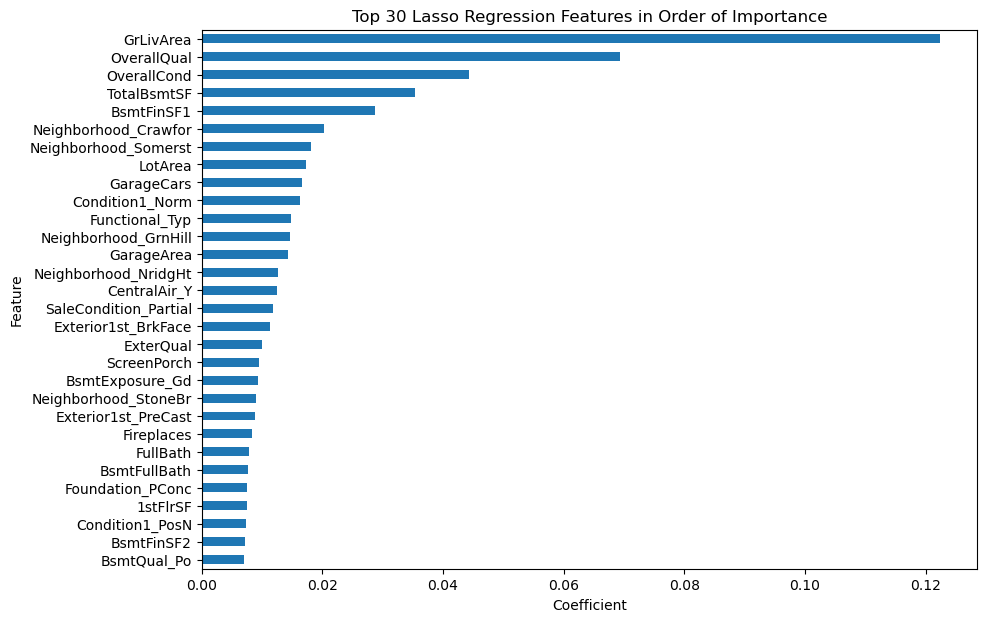

In [140]:
# Get the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Create a bar chart
feature_importances_top_30.sort_values().plot(kind='barh', figsize=(10, 7))

# Labels and titles
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 30 Lasso Regression Features in Order of Importance')

# Show the plot
plt.show()

In [141]:
# Get the features with coefficients of 0
features_zeroes = lassoCoef[lassoCoef == 0]
print(features_zeroes.index.tolist())
print('Number of features with coefficients of 0:', len(features_zeroes))
print('Total number of features:', len(lassoCoef))

['ExterCond', 'BsmtUnfSF', '2ndFlrSF', 'BsmtHalfBath', 'PoolArea', 'MiscVal', 'Crisis', 'MSZoning_FV', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_MetalSd', 'Exterior2nd_Stone', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_None', 'BsmtCond_None', 'BsmtCond_TA', 'BsmtFinType1_BLQ', 'BsmtFinType1_N

## Shapley Values

In [144]:
# Compute the SHAP values for the linear model
explainer = shap.Explainer(lasso_cv, X_train)
shap_values = explainer(X_train)

In [145]:
# Summarize the SHAP values in a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

In [146]:
# Get the mean absolute SHAP value for each feature
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

In [147]:
# Print the top 5 features
print(mean_shap_values.head(5))

GrLivArea          0.102416
OverallQual        0.057880
YrSoldLessBuilt    0.046538
OverallCond        0.033375
TotalBsmtSF        0.027361
dtype: float64


In [148]:
# Print total number of features
print('Total number of features: ', len(mean_shap_values))

Total number of features:  245


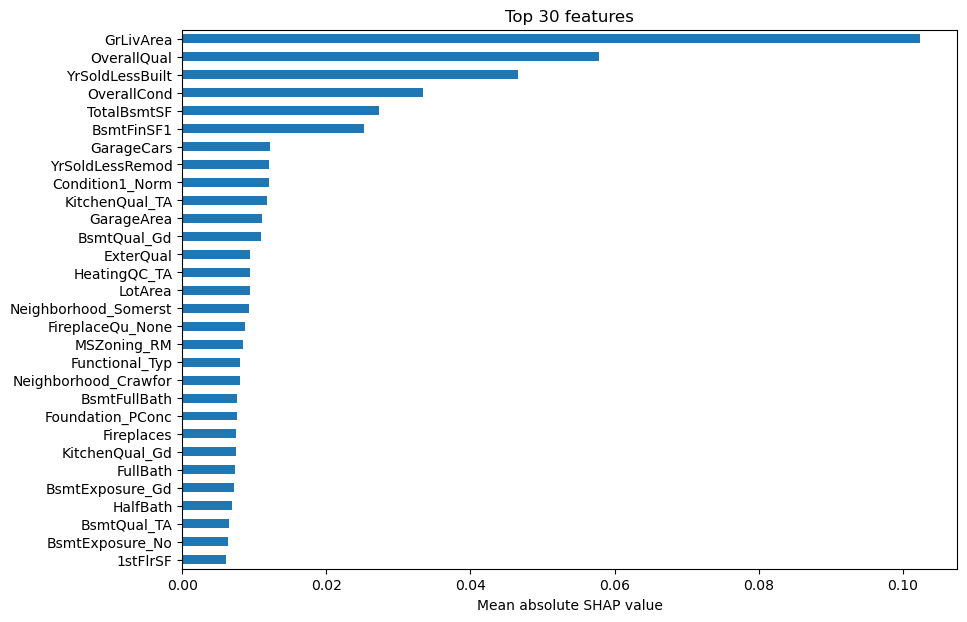

In [149]:
# Plot the top 30 features
mean_shap_values.head(30).plot(kind='barh', figsize=(10, 7))
plt.xlabel('Mean absolute SHAP value')
plt.title('Top 30 features')
plt.gca().invert_yaxis()
plt.show()